In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, excel file I/O (e.g. pd.read_excel)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_excel('kimia2018-2019.xlsx', header=None)

In [3]:
# Menghapus Index ke-0
df = df.drop([0])

# Menghapus Index
df = df.reset_index(drop=True)
df.columns = ['Nim','Nama','Prodi','Lama Penulisan','SKS','IPK','TOEFL','Kelas']

In [4]:
df.head()

,Nim,Nama,Prodi,Lama Penulisan,SKS,IPK,TOEFL,Kelas
0,1700020127,Hasna Qoryatun Nafi’ah,Teknik Kimia,11.4,146,3.34,435,Tidak Tepat Waktu
1,1700020130,Fadiya Salwa Zaizafun,Teknik Kimia,11.4,146,3.14,451,Tidak Tepat Waktu
2,1700020021,Zusuf Tri Purnomo,Teknik kimia,8.733333,146,3.74,490,Tidak Tepat Waktu
3,1700020027,Anggun Ansafa Wati,Teknik Kimia,3.533333,148,3.92,448,Tepat Waktu
4,1700020029,Ridho Mahendra,Teknik Kimia,0.5,146,3.57,498,Tepat Waktu


In [5]:
df.shape

(150, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nim             150 non-null    object
 1   Nama            150 non-null    object
 2   Prodi           150 non-null    object
 3   Lama Penulisan  150 non-null    object
 4   SKS             150 non-null    object
 5   IPK             150 non-null    object
 6   TOEFL           150 non-null    object
 7   Kelas           150 non-null    object
dtypes: object(8)
memory usage: 9.5+ KB


In [7]:
df.isnull().values.any()

False

In [8]:
ket = {"Tepat Waktu" : 0, "Tidak Tepat Waktu" : 1}
df["Kelas"] = df["Kelas"].map(ket)

In [9]:
df['Kelas'].value_counts()

Kelas
0    124
1     26
Name: count, dtype: int64

In [10]:
print('Tepat Waktu', round(df['Kelas'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Tidak Tepat Waktu', round(df['Kelas'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Tepat Waktu 82.67 % of the dataset
Tidak Tepat Waktu 17.33 % of the dataset


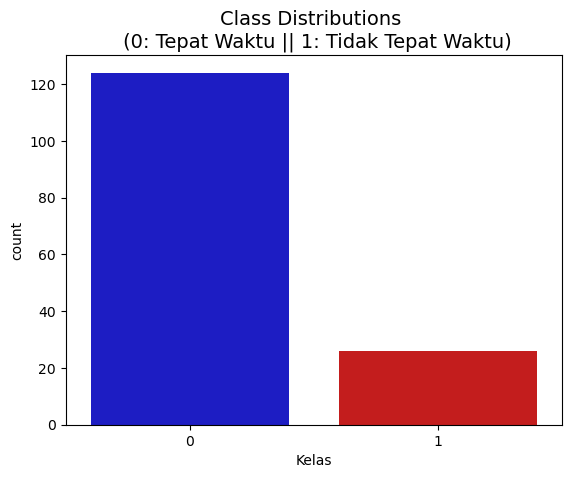

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Kelas', data=df, palette=colors)
plt.title('Class Distributions \n (0: Tepat Waktu || 1: Tidak Tepat Waktu)', fontsize=14)
plt.show()

# Dataset tidak balance


kita Resampling datanya. Resampling ada 2 :

Random Oversampling: Randomly duplicate examples in the minority class.
Random Undersampling: Randomly delete examples in the majority class.
disini kita menggunakan random over sampling

In [12]:
# Class count
count_class_0, count_class_1 = df.Kelas.value_counts()

# Divide by class
df_class_0 = df[df['Kelas'] == 0]
df_class_1 = df[df['Kelas'] == 1]

Random over-sampling:
Kelas
0    124
1    124
Name: count, dtype: int64


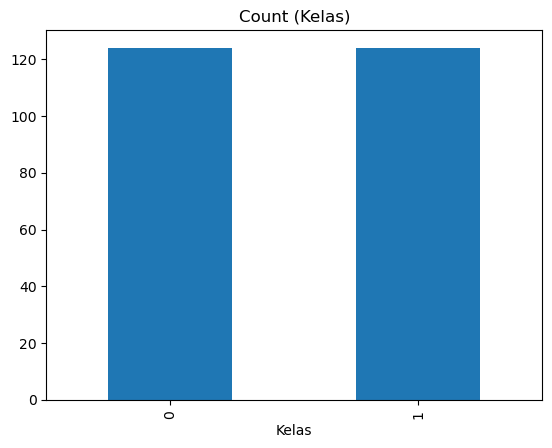

In [13]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Kelas.value_counts())

df_test_over.Kelas.value_counts().plot(kind='bar', title='Count (Kelas)');

gas kan le, kalo udah balance

In [14]:
x = df[['Lama Penulisan', 'SKS', 'IPK', 'TOEFL']]
y = df['Kelas']

In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score

validation_size = 0.30
num_trees = 10

# Pisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, shuffle=False, random_state=None)

In [16]:
# Inisialisasi model Random Forest dengan parameter yang disetel secara manual
model = RandomForestClassifier(
    n_estimators=num_trees,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=2
)

In [17]:
model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [18]:
# Prediksi pada data latih
y_train_pred = model.predict(x_train)

# Prediksi pada data uji
y_test_pred = model.predict(x_test)

In [19]:
# Hitung confusion matrix pada data latih
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

In [20]:
# Hitung akurasi pada data latih
accuracy_train = accuracy_score(y_train, y_train_pred)

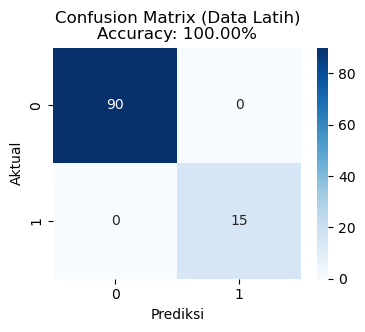

In [21]:
# Visualisasi confusion matrix pada data latih
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix (Data Latih)\nAccuracy: {accuracy_train:.2%}')
plt.show()

In [22]:
# Hitung confusion matrix pada data uji
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [23]:
# Hitung akurasi pada data uji
accuracy_test = accuracy_score(y_test, y_test_pred)

In [24]:
# Ekstraksi nilai dari confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
tn, fp, fn, tp = conf_matrix_test.ravel()

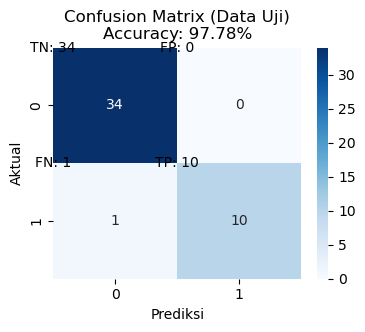

In [25]:
# Visualisasi confusion matrix pada data uji dengan penekanan pada True Positive dan False Negative
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Menambahkan label untuk True Positive dan False Negative
plt.text(0, 0, f'TN: {tn}', horizontalalignment='center', verticalalignment='center')
plt.text(0, 1, f'FN: {fn}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 0, f'FP: {fp}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 1, f'TP: {tp}', horizontalalignment='center', verticalalignment='center')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix (Data Uji)\nAccuracy: {accuracy_test:.2%}')
plt.show()

In [26]:
df_new = pd.read_excel('kimia20.xlsx')

In [27]:
# Menghapus Index
df_new = df_new.reset_index(drop=True)
df_new.columns = ['nim','nama','prodi','Lama Penulisan','SKS','IPK','TOEFL','Kelas']
def_status = 0
df_new.fillna(def_status, inplace = True)
df_new

,nim,nama,prodi,Lama Penulisan,SKS,IPK,TOEFL,Kelas
0,2000020001,Hanif Mulia Hati,TEKNIK KIMIA,6,127,3.05,495,0.0
1,2000020002,Syahrul Dwi Adi Candra,TEKNIK KIMIA,6,126,3.78,480,0.0
2,2000020004,Nidha Amalia Nurillah,TEKNIK KIMIA,8,128,2.83,484,0.0
3,2000020005,Alfina Diah Puspita Anggraeni,TEKNIK KIMIA,5,128,3.17,523,0.0
4,2000020006,Alliya Balqisviratu Hapsari,TEKNIK KIMIA,8,128,3.33,480,0.0
...,...,...,...,...,...,...,...,...
63,2000020092,Silva Nuramalia,TEKNIK KIMIA,7,127,3.50,498,0.0
64,2011020053,Muhammad Izzul Muslimin,TEKNIK KIMIA,7,125,3.11,485,0.0
65,2011020054,Kholif Fathan Muzakki,TEKNIK KIMIA,7,130,3.29,469,0.0
66,2015020045,Fazhar Nuryasari,TEKNIK KIMIA,7,126,3.68,410,0.0


In [28]:
# Mapping kelas menjadi 0 (Tepat Waktu) dan 1 (Tidak Tepat Waktu)
ket = {"Tepat Waktu": 0, "Tidak Tepat Waktu": 1}
df_new["Kelas"] = df_new["Kelas"].map(ket)

In [29]:
# Membuat data training
data2 = df_new.loc[:, ['Lama Penulisan', 'SKS', 'IPK', 'TOEFL']]
X_new = data2

In [30]:
# Prediksi menggunakan model Random Forest yang telah dilatih
predictions_new = model.predict(X_new)

In [31]:
# Mapping hasil prediksi menjadi label yang sesuai
hasil_prediksi = pd.Series(predictions_new).map({0: "Tepat Waktu", 1: "Tidak Tepat Waktu"})

In [32]:
# Menambahkan kolom Hasil ke dataset_new
df_new['Hasil'] = hasil_prediksi

In [33]:
# Menampilkan hasil prediksi
print("Prediksi untuk dataset baru:")
print(df_new[['nim','nama','prodi','Lama Penulisan', 'SKS', 'IPK', 'TOEFL', 'Hasil']])

Prediksi untuk dataset baru:
           nim                           nama         prodi  Lama Penulisan  \
0   2000020001               Hanif Mulia Hati  TEKNIK KIMIA               6   
1   2000020002         Syahrul Dwi Adi Candra  TEKNIK KIMIA               6   
2   2000020004          Nidha Amalia Nurillah  TEKNIK KIMIA               8   
3   2000020005  Alfina Diah Puspita Anggraeni  TEKNIK KIMIA               5   
4   2000020006    Alliya Balqisviratu Hapsari  TEKNIK KIMIA               8   
..         ...                            ...           ...             ...   
63  2000020092                Silva Nuramalia  TEKNIK KIMIA               7   
64  2011020053        Muhammad Izzul Muslimin  TEKNIK KIMIA               7   
65  2011020054          Kholif Fathan Muzakki  TEKNIK KIMIA               7   
66  2015020045               Fazhar Nuryasari  TEKNIK KIMIA               7   
67  2015020046               Dwi Ayu Ningtyas  TEKNIK KIMIA               7   

    SKS   IPK  TOEFL  

In [34]:
# Hitung nilai kelas
class_counts = df_new.Hasil.value_counts()

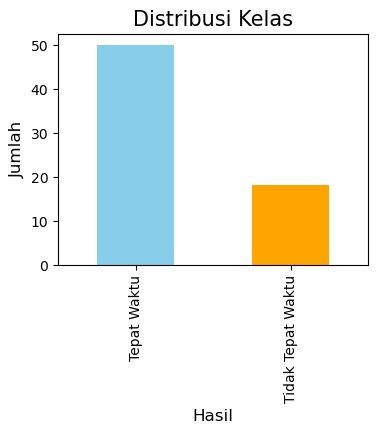

In [35]:
# Buat plot bar
plt.figure(figsize=(4,3))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
# Beri judul dan label sumbu
plt.title('Distribusi Kelas', fontsize=15)
plt.xlabel('Hasil', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tampilkan plot
plt.show()

In [36]:
# Simpan model ke dalam file menggunakan pickle
import pickle
with open('kimia.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)